In [1]:
import pandas as pd
from pathlib import Path

results_dir = Path("results")

# PyTorch
results_pytorch_cv = results_dir / "results_pytorch_cv"
results_pytorch_nlp = results_dir / "results_pytorch_nlp"

# TensorFlow
results_tensorflow_cv = results_dir / "results_tensorflow_cv"
results_tensorflow_nlp = results_dir / "results_tensorflow_nlp"

# Llama
results_llama = results_dir / "results_llama2"

In [2]:
# Make processor to name dict
processor_to_name_dict = {
    "apple_m1_pro": "Apple_M1_Pro",
    "apple_m3": "Apple_M3",
    "apple_m3_pro": "Apple_M3_Pro",
    "apple_m3_max": "Apple_M3_Max",
}

## PyTorch Results

In [16]:
# PyTorch NLP

# Get all csv files in PyTorch NLP results directory
pytorch_results_nlp_files = list(results_pytorch_nlp.glob("*.csv"))

dataset_name = "IMDB"

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
pytorch_results_nlp_dfs = []
for file in pytorch_results_nlp_files:
    df = pd.read_csv(file)
    df["processor"] = str(file.stem).split("IMDB")[0].replace("_", " ").strip()
    pytorch_results_nlp_dfs.append(df)

# Combine all csv files into one dataframe
pytorch_results_nlp_df = pd.concat(
    pytorch_results_nlp_dfs, ignore_index=True
)

pytorch_results_nlp_df

# Replace values in avg_time_per_epoch column with None if they == "FAILED"
pytorch_results_nlp_df.loc[
    pytorch_results_nlp_df["train_samples_per_second"] == "FAILED", "train_samples_per_second"
] = 0.0

pytorch_results_nlp_df["train_samples_per_second"] = pytorch_results_nlp_df["train_samples_per_second"].astype(float).round(2)
pytorch_results_nlp_df

,train_runtime,train_samples_per_second,train_steps_per_second,train_loss,epoch,batch_size,total_flos,processor
0,6388.8935,11.74,0.734,0.25999131531165237,3.0,16,NaN,Apple M3
1,FAILED,0.00,FAILED,FAILED,FAILED,32,FAILED,Apple M3
2,1531.3382,48.98,3.062,0.25682562504477735,3.0,16,NaN,Apple M3 Max
3,1554.8644,48.24,1.509,0.26505871095519135,3.0,32,NaN,Apple M3 Max
4,1544.9908,48.54,0.759,0.2823666493707707,3.0,64,NaN,Apple M3 Max
5,1552.6414,48.30,0.379,0.3112917984423994,3.0,128,NaN,Apple M3 Max
6,1707.9282,43.91,0.172,0.35917624648736446,3.0,256,NaN,Apple M3 Max
7,FAILED,0.00,FAILED,FAILED,FAILED,512,FAILED,Apple M3 Max
8,2425.8181,30.92,1.933,0.25534291591794794,3.0,16,NaN,Apple M1 Pro
9,2398.7046,31.27,0.978,0.2650448570674236,3.0,32,NaN,Apple M1 Pro


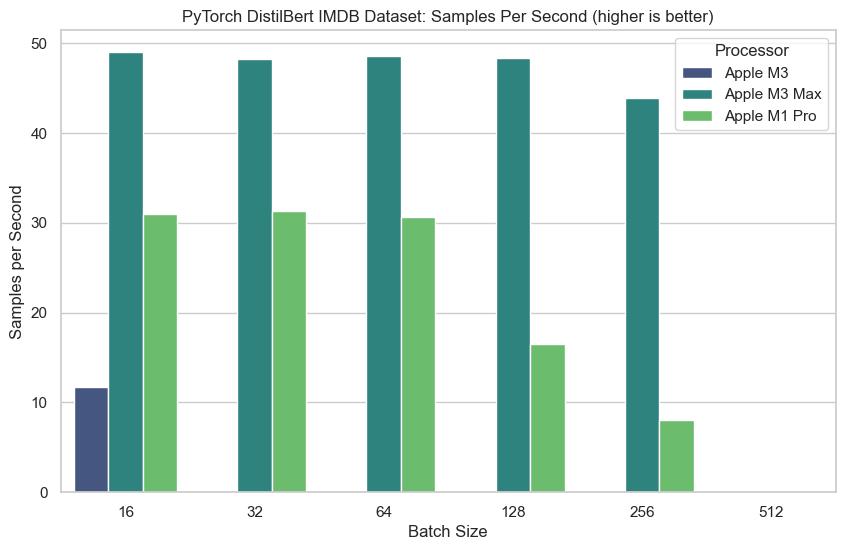

In [17]:
# TODO PyTorch NLP results - plot train samples per second (higher is better)
# Removed "FAILED" values and set to 0.0

# Plot train samples per second
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
sns.barplot(x="batch_size", y="train_samples_per_second", hue="processor", data=pytorch_results_nlp_df, palette="viridis")
plt.title("PyTorch DistilBert IMDB Dataset: Samples Per Second (higher is better)")
plt.xlabel("Batch Size")
plt.ylabel("Samples per Second")
plt.legend(title="Processor")
plt.show()

In [18]:
# PyTorch CV CIFAR100

# Get all csv files in PyTorch CV results directory
pytorch_results_cv_files = sorted(list(results_pytorch_cv.glob("*.csv")))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
pytorch_results_cv_dfs = []
for file in pytorch_results_cv_files:
    df = pd.read_csv(file)
    if "CIFAR100" in str(file.stem):
        df["dataset"] = "CIFAR100"
        df["processor"] = str(file.stem).split("CIFAR100")[0].replace("_", " ").strip()

    if "FOOD101" in str(file.stem):
        df["dataset"] = "FOOD101"
        df["processor"] = str(file.stem).split("FOOD101")[0].replace("_", " ").strip()

    pytorch_results_cv_dfs.append(df)

# Combine all csv files into one dataframe
pytorch_results_cv_df = pd.concat(
    pytorch_results_cv_dfs, ignore_index=True
)

# Replace values in avg_time_per_epoch column with None if they == "FAILED"
pytorch_results_cv_df.loc[
    pytorch_results_cv_df["avg_time_per_epoch"] == "FAILED", "avg_time_per_epoch"
] = 0.0

pytorch_results_cv_df["avg_time_per_epoch"] = pytorch_results_cv_df["avg_time_per_epoch"].astype(float).round(2)
pytorch_results_cv_df

,batch_size,avg_time_per_epoch,dataset,processor
0,16,383.19,CIFAR100,Apple M1 Pro
1,32,225.42,CIFAR100,Apple M1 Pro
2,64,153.70,CIFAR100,Apple M1 Pro
3,128,121.98,CIFAR100,Apple M1 Pro
4,256,116.22,CIFAR100,Apple M1 Pro
5,512,113.35,CIFAR100,Apple M1 Pro
6,1024,110.80,CIFAR100,Apple M1 Pro
7,32,1266.55,FOOD101,Apple M1 Pro
8,64,1200.80,FOOD101,Apple M1 Pro
9,128,1186.38,FOOD101,Apple M1 Pro


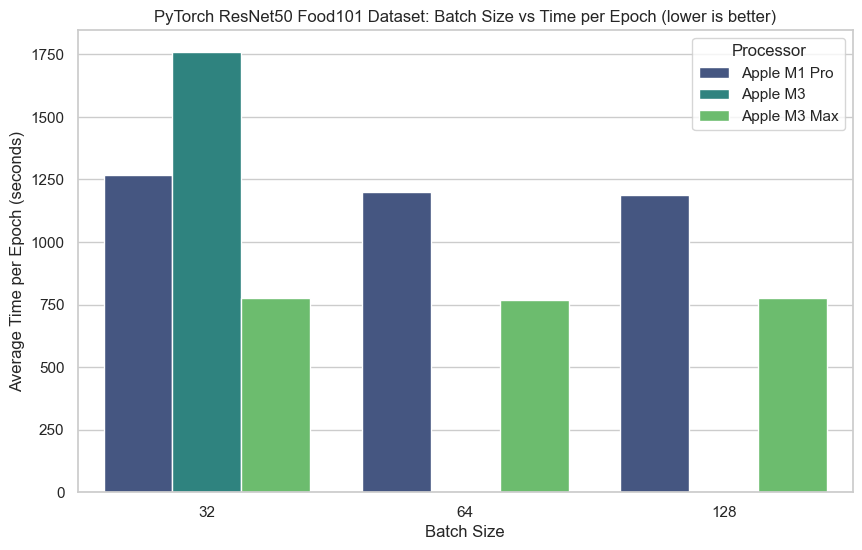

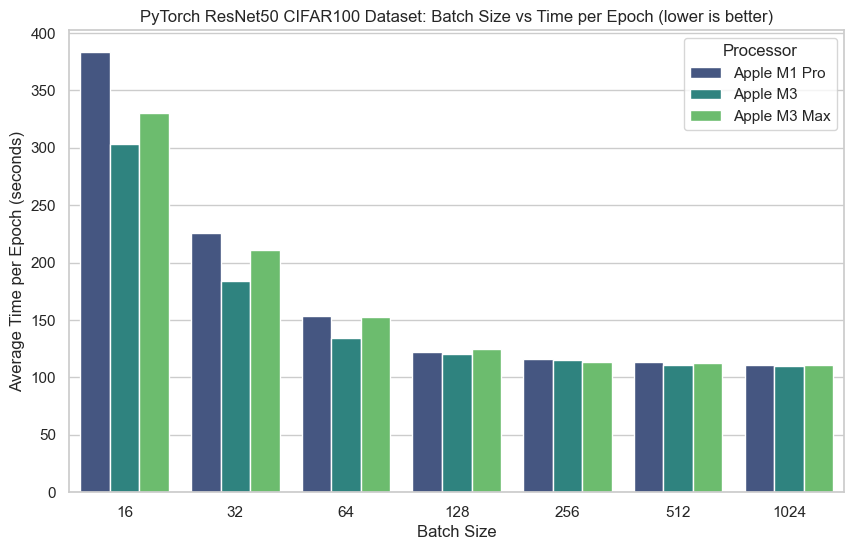

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate data for FOOD101 and CIFAR100
pytorch_cv_food101_data = pytorch_results_cv_df[pytorch_results_cv_df["dataset"] == "FOOD101"]
pytorch_cv_cifar100_data = pytorch_results_cv_df[pytorch_results_cv_df["dataset"] == "CIFAR100"]

# Plot settings
sns.set(style="whitegrid")

# Plot for FOOD101 dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="batch_size", y="avg_time_per_epoch", hue="processor", data=pytorch_cv_food101_data, palette="viridis")
plt.title("PyTorch ResNet50 Food101 Dataset: Batch Size vs Time per Epoch (lower is better)")
plt.xlabel("Batch Size")
plt.ylabel("Average Time per Epoch (seconds)")
plt.legend(title="Processor")
plt.show()

# Plot for CIFAR100 dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="batch_size", y="avg_time_per_epoch", hue="processor", data=pytorch_cv_cifar100_data, palette="viridis")
plt.title("PyTorch ResNet50 CIFAR100 Dataset: Batch Size vs Time per Epoch (lower is better)")
plt.xlabel("Batch Size")
plt.ylabel("Average Time per Epoch (seconds)")
plt.legend(title="Processor")
plt.show()

## TensorFlow Results

In [7]:
# TensorFlow NLP

# Get all csv files in TensorFlow NLP results directory
tensorflow_results_nlp_files = list(results_tensorflow_nlp.glob("*.csv"))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
tensorflow_results_nlp_dfs = []
for file in tensorflow_results_nlp_files:
    df = pd.read_csv(file)
    df["processor"] = str(file.stem).split("IMDB")[0].replace("_", " ").strip()
    tensorflow_results_nlp_dfs.append(df)

# Combine all csv files into one dataframe
tensorflow_results_nlp_df = pd.concat(
    tensorflow_results_nlp_dfs, ignore_index=True
)

tensorflow_results_nlp_df["avg_time_per_epoch"] = tensorflow_results_nlp_df["avg_time_per_epoch"].astype(float).round(2)
tensorflow_results_nlp_df

,batch_size,avg_time_per_epoch,processor
0,16,211.15,Apple M1 Pro
1,32,182.09,Apple M1 Pro
2,64,178.21,Apple M1 Pro
3,128,172.25,Apple M1 Pro
4,16,158.08,Apple M3 Max
5,32,138.93,Apple M3 Max
6,64,120.75,Apple M3 Max
7,128,114.80,Apple M3 Max
8,16,186.32,Apple M3
9,32,162.64,Apple M3


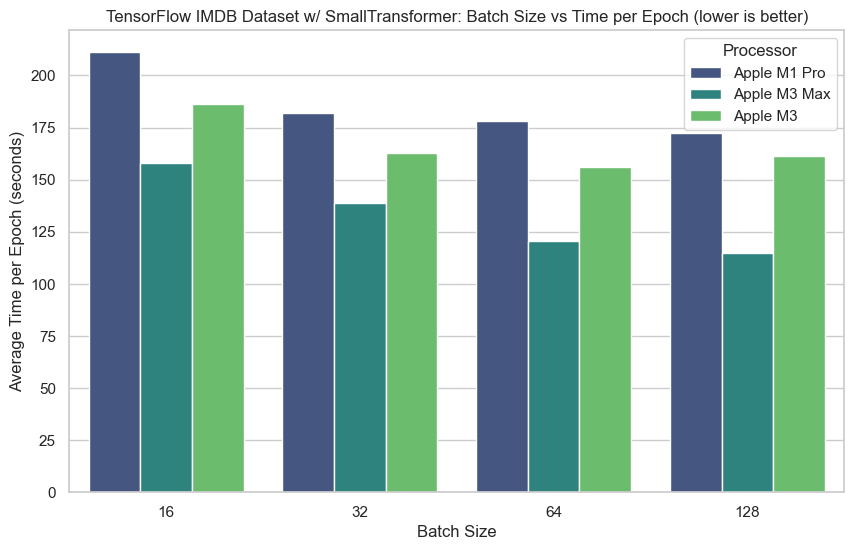

In [8]:
# Create a bar plot of tensorflow_results_nlp_df of batch_size vs avg_time_per_epoch
plt.figure(figsize=(10, 6))
sns.barplot(x="batch_size", y="avg_time_per_epoch", hue="processor", data=tensorflow_results_nlp_df, palette="viridis")
plt.title("TensorFlow IMDB Dataset w/ SmallTransformer: Batch Size vs Time per Epoch (lower is better)")
plt.xlabel("Batch Size")
plt.ylabel("Average Time per Epoch (seconds)")
plt.legend(title="Processor")
plt.show()

In [9]:
# TensorFlow CV

# Get all csv files in TensorFlow CV results directory
tensorflow_results_cv_files = list(results_tensorflow_cv.glob("*.csv"))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
tensorflow_results_cv_dfs = []
for file in tensorflow_results_cv_files:
    df = pd.read_csv(file)
    if "CIFAR100" in str(file.stem):
        df["dataset"] = "CIFAR100"
        df["processor"] = str(file.stem).split("CIFAR100")[0].replace("_", " ").strip()

    if "FOOD101" in str(file.stem):
        df["dataset"] = "FOOD101"
        df["processor"] = str(file.stem).split("FOOD101")[0].replace("_", " ").strip()

    tensorflow_results_cv_dfs.append(df)

# Combine all csv files into one dataframe
tensorflow_results_cv_df = pd.concat(
    tensorflow_results_cv_dfs, ignore_index=True
)

# Replace values in avg_time_per_epoch column with None if they == "FAILED"
tensorflow_results_cv_df.loc[
    tensorflow_results_cv_df["avg_time_per_epoch"] == "FAILED", "avg_time_per_epoch"
] = 0.0

tensorflow_results_cv_df["avg_time_per_epoch"] = tensorflow_results_cv_df["avg_time_per_epoch"].astype(float).round(2)
tensorflow_results_cv_df

tensorflow_results_cv_df

,batch_size,avg_time_per_epoch,dataset,processor
0,32,670.95,FOOD101,Apple M3 Max
1,64,643.06,FOOD101,Apple M3 Max
2,128,646.86,FOOD101,Apple M3 Max
3,32,1575.04,FOOD101,Apple M3
4,64,3207.97,FOOD101,Apple M3
5,128,2587.59,FOOD101,Apple M3
6,32,987.39,FOOD101,Apple M1 Pro
7,64,938.93,FOOD101,Apple M1 Pro
8,128,926.64,FOOD101,Apple M1 Pro
9,16,184.64,CIFAR100,Apple M1 Pro


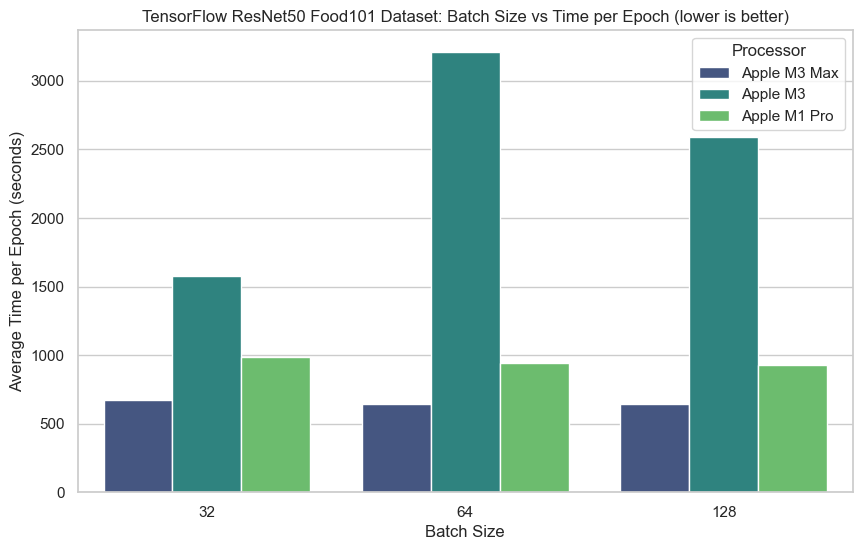

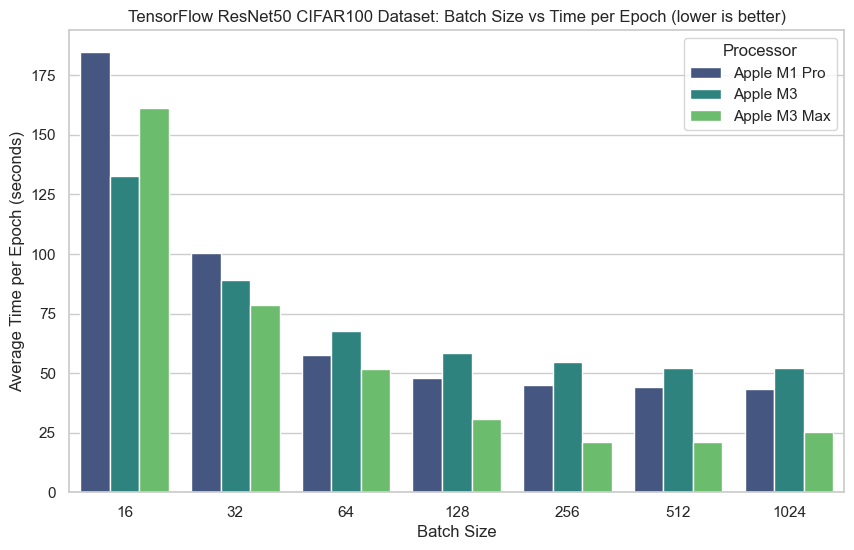

In [10]:
# Separate data for FOOD101 and CIFAR100
tensorflow_cv_food101_data = tensorflow_results_cv_df[tensorflow_results_cv_df["dataset"] == "FOOD101"]
tensorflow_cv_cifar100_data = tensorflow_results_cv_df[tensorflow_results_cv_df["dataset"] == "CIFAR100"]

# Plot settings
sns.set(style="whitegrid")

# Plot for FOOD101 dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="batch_size", y="avg_time_per_epoch", hue="processor", data=tensorflow_cv_food101_data, palette="viridis")
plt.title("TensorFlow ResNet50 Food101 Dataset: Batch Size vs Time per Epoch (lower is better)")
plt.xlabel("Batch Size")
plt.ylabel("Average Time per Epoch (seconds)")
plt.legend(title="Processor")
plt.show()

# Plot for CIFAR100 dataset
plt.figure(figsize=(10, 6))
sns.barplot(x="batch_size", y="avg_time_per_epoch", hue="processor", data=tensorflow_cv_cifar100_data, palette="viridis")
plt.title("TensorFlow ResNet50 CIFAR100 Dataset: Batch Size vs Time per Epoch (lower is better)")
plt.xlabel("Batch Size")
plt.ylabel("Average Time per Epoch (seconds)")
plt.legend(title="Processor")
plt.show()

## Llama Results

In [11]:
## Llama results

# Get all csv files in Llama results directory
llama_results_files = list(results_llama.glob("*.csv"))

# Open each csv file as a DataFrame and add the name of processor to the DataFrame
llm_model_name = "llama-2-7b-chat.Q4_0.gguf"

llama_results_dfs = []
for file in llama_results_files:
    df = pd.read_csv(file)
    df["processor"] = str(file.stem).split(llm_model_name)[0].replace("_", " ").strip()
    llama_results_dfs.append(df)

# Combine all csv files into one dataframe
llama_results_df = pd.concat(
    llama_results_dfs, ignore_index=True
)

# Group by the processor and then get the mean tokens_per_second
mean_tokens_per_second = pd.DataFrame(llama_results_df.groupby(["processor"])["tokens_per_second"].mean()).reset_index()
mean_tokens_per_second

,processor,tokens_per_second
0,Apple M1 Pro,34.1110
1,Apple M3,20.8551
2,Apple M3 Max,47.5658


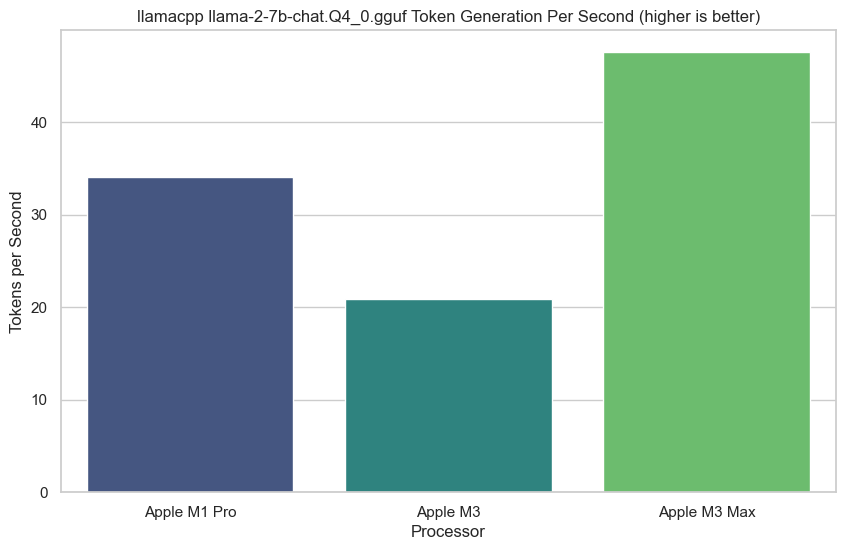

In [12]:
# Plot for Llama results
plt.figure(figsize=(10, 6))
sns.barplot(x="processor", 
            y="tokens_per_second", 
            hue="processor", 
            data=mean_tokens_per_second, 
            palette="viridis")
plt.title(f"llamacpp {llm_model_name} Token Generation Per Second (higher is better)") 
plt.xlabel("Processor")
plt.ylabel("Tokens per Second")
# plt.legend(title="Processor")
plt.show()